In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import *
from sklearn.preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.metrics import *
from pycaret.regression import *
# from custom_function import *
from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import *
train = pd.read_csv('Train-Set.csv')


# 빅마트 매출예측
https://www.kaggle.com/datasets/akashdeepkuila/big-mart-sales?select=Train-Set.csv

In [41]:
train.info()

#  열이름

train

# 'ProductID' : '제품ID'
# 'Weight' : '제품의 무게
# 'FatContent' : '제품의 지방의 함량'
# 'ProductVisibility' : 제품 가시성(특정 제품에 할당된 매장 내 모든 제품의 전체 디스플레이 영역 비율)
# 'ProductType' : 상품 유형
# 'MRP' : 제품의 최대 소매 가격(정가)
# 'OutletID' : 고유 매장 ID
# 'EstablishmentYear' : 매장 설립 연도
# 'OutletSize' : 매장 규모
# 'LocationType' : 위치 유형
# 'OutletType': 매장 타입
# ,OutletSales': 매장 매출 ('종속변수')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 데이터 확인, EDA

In [42]:
train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
train.info()
# category col_name = ['ProductID','FatContent','ProductType','OutletID','OutletSize','LocationType','OutletType']
# num col_num = ['Weight','ProductVisibility','MRP','EstablishmentYear','OutletSales']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot: >

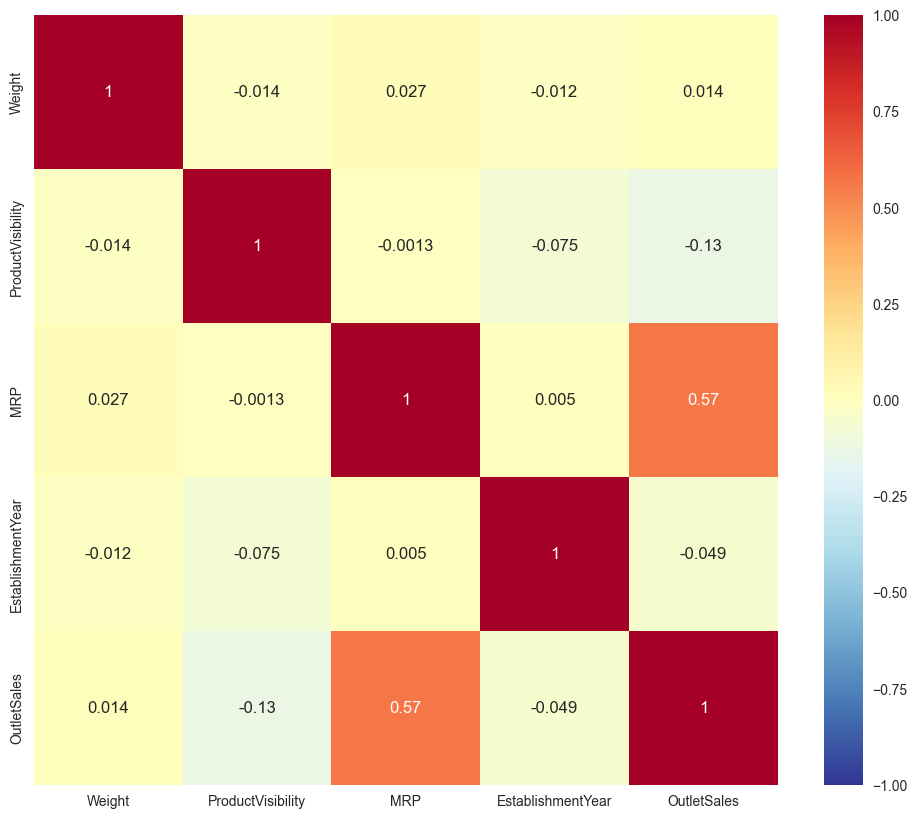

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),
            annot=True,
            cmap = 'RdYlBu_r',
            vmin = -1, vmax = 1)

In [45]:
# category unique() 확인
col_name = ['ProductID','FatContent','ProductType','OutletID'
,'OutletSize','LocationType','OutletType']

for i in col_name:
    print(f'----------------------------[{i}]----------------------------')
    print(train[i].unique())


----------------------------[ProductID]----------------------------
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
----------------------------[FatContent]----------------------------
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
----------------------------[ProductType]----------------------------
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
----------------------------[OutletID]----------------------------
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
----------------------------[OutletSize]----------------------------
['Medium' nan 'High' 'Small']
----------------------------[LocationType]----------------------------
['Tier 1' 'Tier 3' 'Tier 2']
----------------------------[OutletType]----------------------------
['Supermarket Type1' 'Supermarket Type2' 'Grocery Stor

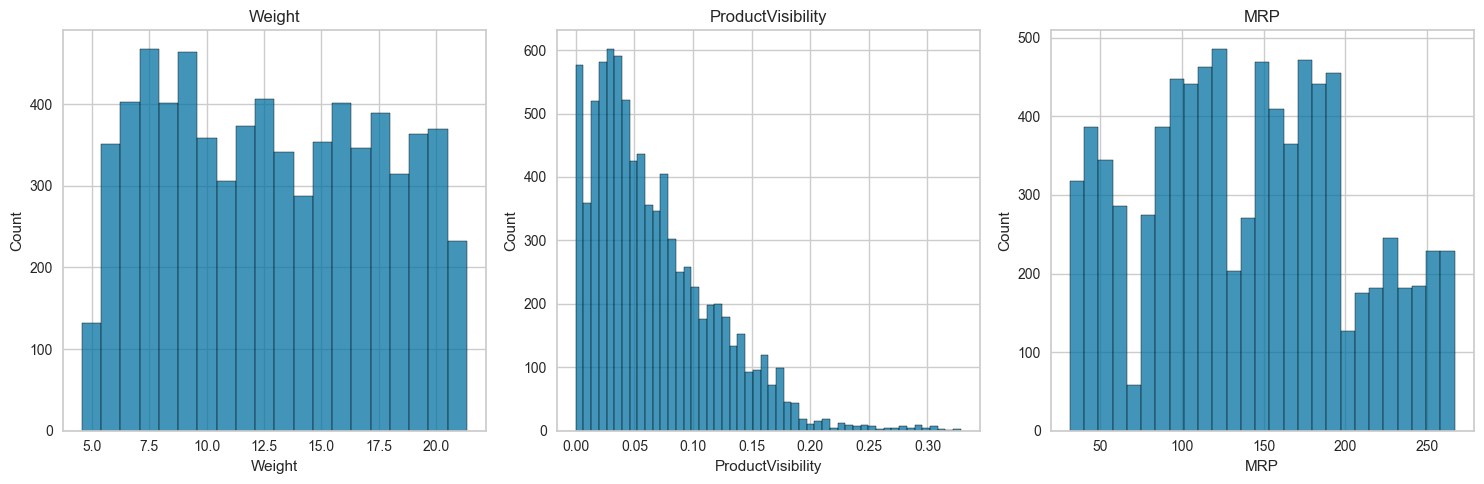

In [46]:
num_col = ['Weight', 'ProductVisibility', 'MRP']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, ax in zip(num_col, axs.flatten()):
    sns.histplot(train[i], ax=ax)
    ax.set_title(i)
    
plt.tight_layout()
plt.show()

In [47]:
# 정규화 

MM = MinMaxScaler()
SS = StandardScaler()
RS = RobustScaler()

data = train.iloc[:,[1,3,5]]

data_MM = MM.fit_transform(data)
data_SS = SS.fit_transform(data)
data_RS = RS .fit_transform(data)

data_MM=pd.DataFrame(data_MM,columns=data.columns)
data_SS=pd.DataFrame(data_SS,columns=data.columns)
data_RS=pd.DataFrame(data_RS,columns=data.columns)


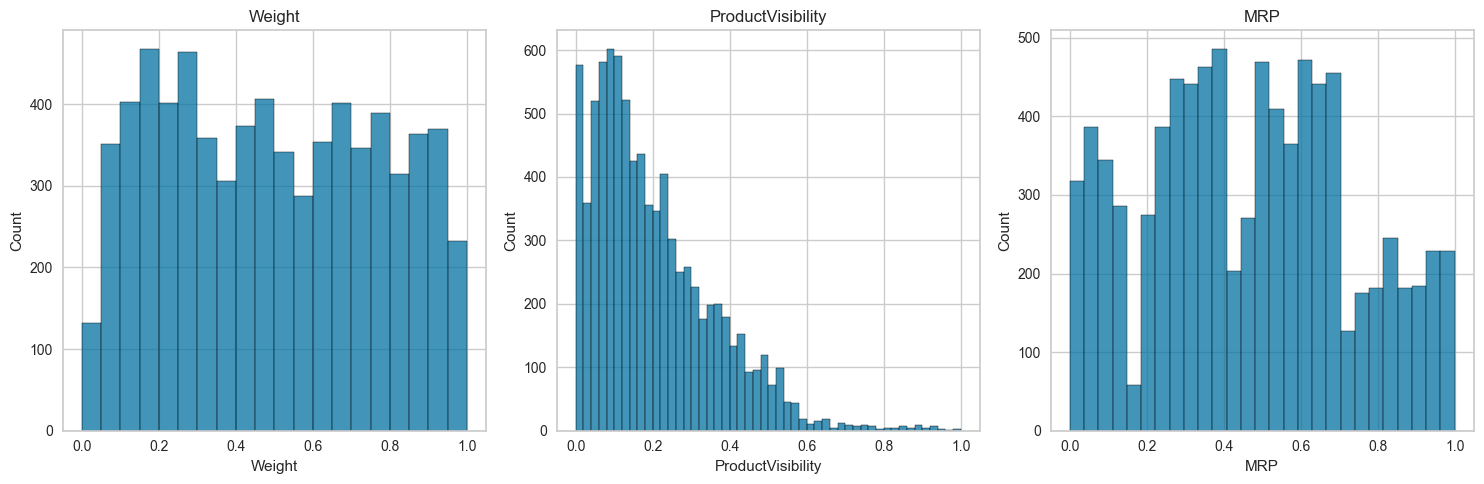

In [48]:
# num_col = 

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, ax in zip(data_MM.columns, axs.flatten()):
    sns.histplot(data_MM[i], ax=ax)
    ax.set_title(i)
    
plt.tight_layout()
plt.show()

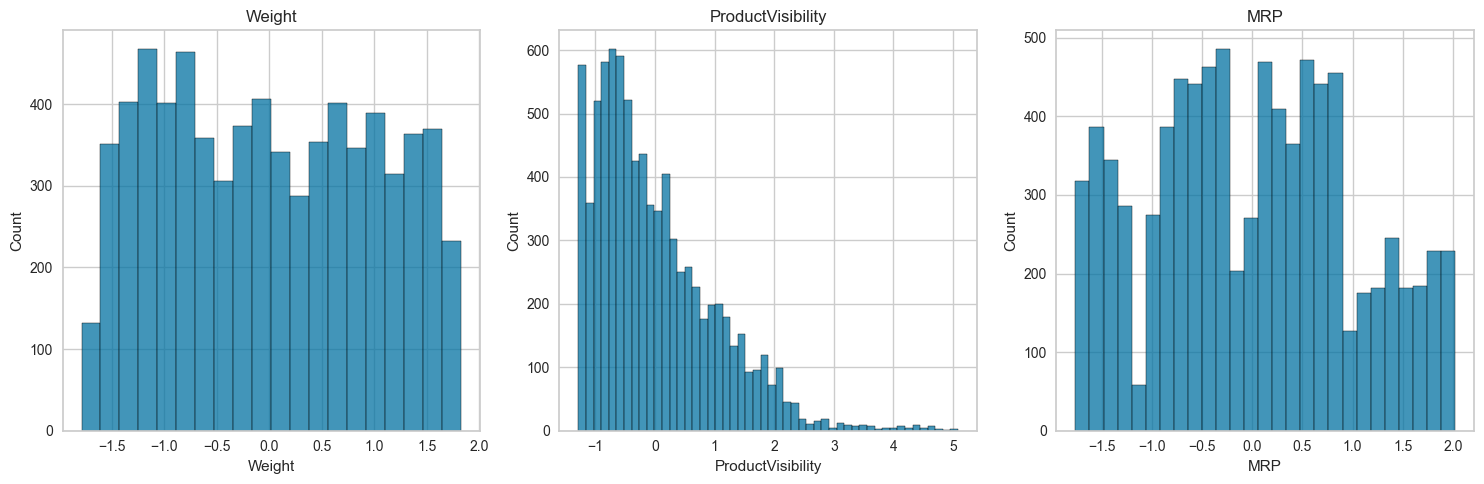

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, ax in zip(data_SS.columns, axs.flatten()):
    sns.histplot(data_SS[i], ax=ax)
    ax.set_title(i)
    
plt.tight_layout()
plt.show()

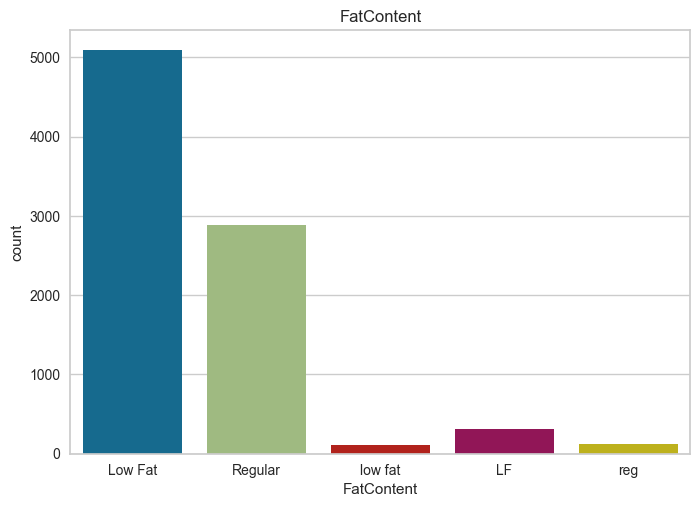

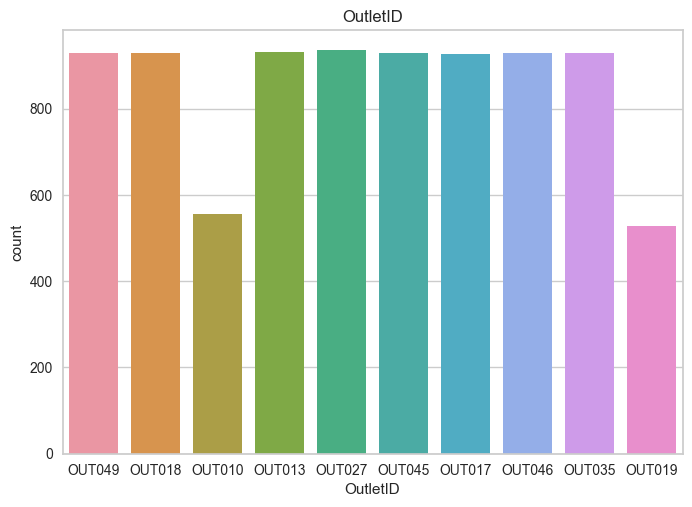

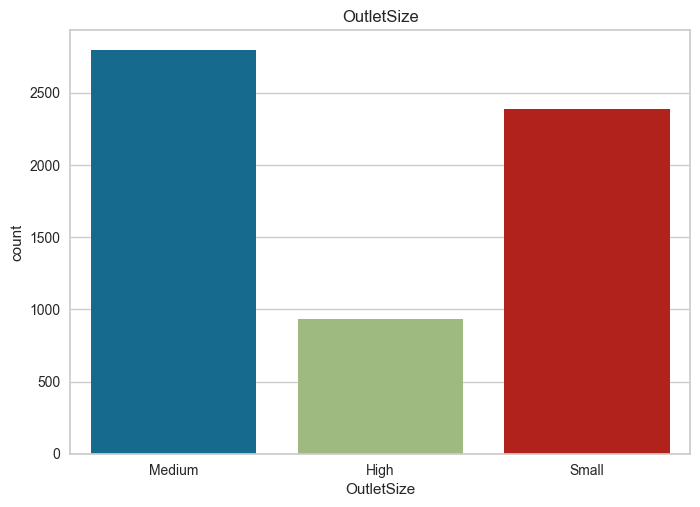

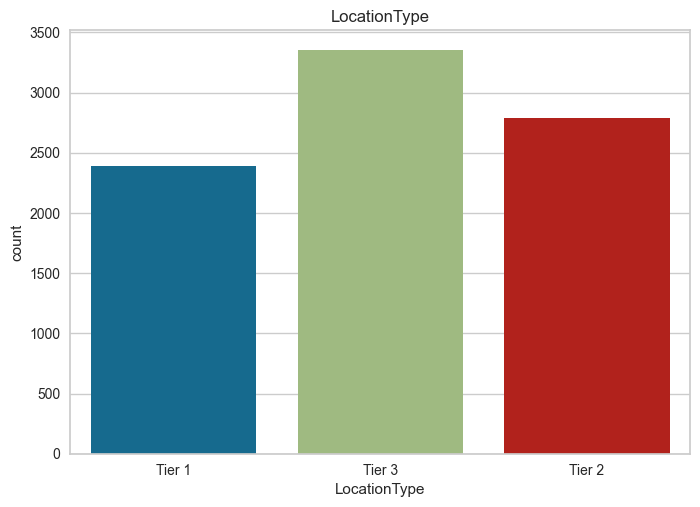

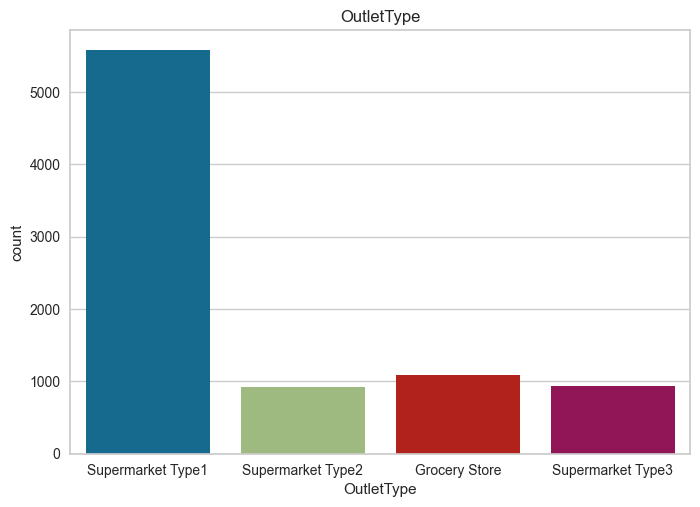

<AxesSubplot: xlabel='ProductType', ylabel='count'>

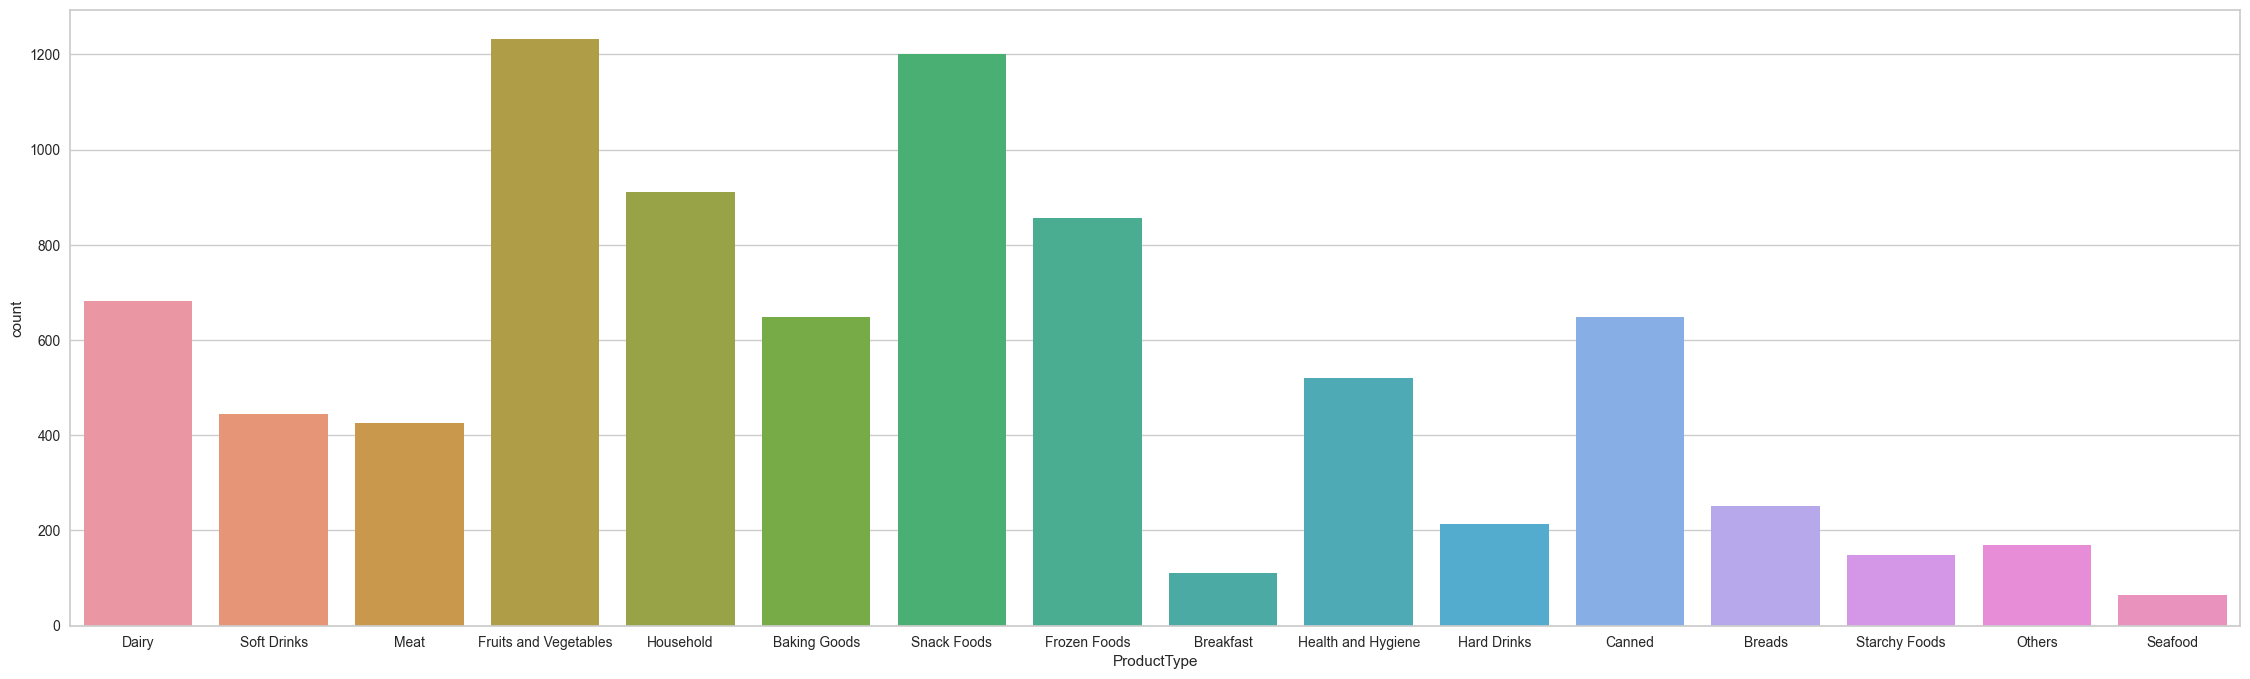

In [50]:
# 카테고리 갯수 확인

lst = ['FatContent','OutletID'
,'OutletSize','LocationType','OutletType']


for i in lst:
    sns.countplot(x = i, data = train)
    plt.title(i)
    plt.show()
plt.figure(figsize=(28,8))
sns.countplot(x='ProductType', data = train)

# 전처리

In [51]:
# 결측치 확인
train.isnull().sum()


ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [52]:
# train.drop(['ProductID','EstablishmentYear'],axis=1,inplace=True)

In [53]:
# 1. Iterative로 Weight 결측치 제거

# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer(random_state=2021)
# train_df = train.copy()

# num_col = ['Weight','ProductVisibility','MRP','EstablishmentYear','OutletSales']

# df_im = imputer.fit_transform(train_df[['Weight']])
# train['Weight'] = df_im

In [54]:
# 2. Simple mean으로 Weight 결측치 제거

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_df = train.copy()

num_col = ['Weight','ProductVisibility','MRP','OutletSales']

df_im = imputer.fit_transform(train_df[['Weight']])
train['Weight'] = df_im

In [55]:
# OutletSize 결측치 없애기
# 최빈값 연결.

from scipy.stats import mode
mode_of_outlet_size = train.pivot_table(values = 'OutletSize', index = 'OutletType',aggfunc=(lambda x : mode(x.dropna()).mode[0]))
missing_values = train["OutletSize"].isnull()
train.loc[missing_values, 'OutletSize'] = train.loc[missing_values, 'OutletType'].apply(lambda x: mode_of_outlet_size.loc[x])

In [56]:
# FatContent 분류해주기
print(train['FatContent'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64


In [57]:
train.replace({'FatContent': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
print(train['FatContent'].value_counts())

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64


In [58]:
train['FatContent'].value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

In [76]:
# FatContent 분류해주기
print(train['ProductType'].value_counts())

1    4286
2    3578
0     659
Name: ProductType, dtype: int64


In [60]:
train.replace({'ProductType': {'Fruits and Vegetables':'Food','Snack Foods':'Food','Meat':'Food','Breads':'Food','Starchy Foods':'Food','Starchy Foods':'Food','Seafood':'Food','Breakfast':'Food','Frozen Foods':'Food','Household':'Not Food/drink','Dairy':'Not Food/drink','Canned':'Not Food/drink','Baking Goods':'Not Food/drink','Others':'Not Food/drink','Health and Hygiene':'Not Food/drink','Soft Drinks':'Drinks','Hard Drinks':'Drinks','food':'Food'}},inplace=True)
print(train['ProductType'].value_counts())

Food              4286
Not Food/drink    3578
Drinks             659
Name: ProductType, dtype: int64


In [61]:
train.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [62]:
# from sklearn import preprocessing
# label_encoder=preprocessing.LabelEncoder()
# train['ProductID']=label_encoder.fit_transform(train['ProductID'])
# train['OutletSize']=label_encoder.fit_transform(train['OutletSize'])
# train['LocationType']=label_encoder.fit_transform(train['LocationType'])
# train['OutletType']=label_encoder.fit_transform(train['OutletType'])

In [63]:
# 카테고리형 라벨인코딩 진행

from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()

col_name = ['ProductID','FatContent','ProductType','OutletID','OutletSize','LocationType','OutletType']

for col in col_name:
    train[col] = encoder.fit_transform(train[col])



In [64]:
# dummies
data1 = pd.get_dummies(train, columns=['ProductType','FatContent','OutletID','OutletSize','LocationType','OutletType'])
data1.columns
# data2 = data1.iloc[:,6:].astype('float')
# data3 = data1.iloc[:,:6]


Index(['ProductID', 'Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear',
       'OutletSales', 'ProductType_0', 'ProductType_1', 'ProductType_2',
       'FatContent_0', 'FatContent_1', 'OutletID_0', 'OutletID_1',
       'OutletID_2', 'OutletID_3', 'OutletID_4', 'OutletID_5', 'OutletID_6',
       'OutletID_7', 'OutletID_8', 'OutletID_9', 'OutletSize_0',
       'OutletSize_1', 'OutletSize_2', 'LocationType_0', 'LocationType_1',
       'LocationType_2', 'OutletType_0', 'OutletType_1', 'OutletType_2',
       'OutletType_3'],
      dtype='object')

In [65]:
data1.dtypes

ProductID              int32
Weight               float64
ProductVisibility    float64
MRP                  float64
EstablishmentYear      int64
OutletSales          float64
ProductType_0          uint8
ProductType_1          uint8
ProductType_2          uint8
FatContent_0           uint8
FatContent_1           uint8
OutletID_0             uint8
OutletID_1             uint8
OutletID_2             uint8
OutletID_3             uint8
OutletID_4             uint8
OutletID_5             uint8
OutletID_6             uint8
OutletID_7             uint8
OutletID_8             uint8
OutletID_9             uint8
OutletSize_0           uint8
OutletSize_1           uint8
OutletSize_2           uint8
LocationType_0         uint8
LocationType_1         uint8
LocationType_2         uint8
OutletType_0           uint8
OutletType_1           uint8
OutletType_2           uint8
OutletType_3           uint8
dtype: object

In [66]:
abs(train.corr().OutletSales).sort_values(ascending=True)

ProductID            0.002869
ProductType          0.006626
Weight               0.011550
FatContent           0.018719
EstablishmentYear    0.049135
LocationType         0.089367
ProductVisibility    0.128625
OutletID             0.162325
OutletSize           0.162753
OutletType           0.401522
MRP                  0.567574
OutletSales          1.000000
Name: OutletSales, dtype: float64

In [67]:
# Min_Max
MM_df = pd.concat([train,data_MM],axis=1)
MM_df = MM_df.iloc[:,[1,3,5,6,7,8,9,10,11,12]]


# Standard
SS_df = pd.concat([train,data_SS],axis=1)
SS_df = SS_df.iloc[:,[1,3,5,6,7,8,9,10,11,12]]


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   int32  
 1   Weight             8523 non-null   float64
 2   FatContent         8523 non-null   int32  
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   int32  
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   int32  
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         8523 non-null   int32  
 9   LocationType       8523 non-null   int32  
 10  OutletType         8523 non-null   int32  
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [69]:
data = data1.drop('OutletSales',axis=1)
target = data1['OutletSales']

# flask 적용 data
train.to_csv('final.csv',index = False)

In [70]:
X_train,X_test,y_train,y_test=train_test_split(data1,target,test_size=0.2,random_state=2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(6818, 31) (6818,) (1705, 31) (1705,)


In [71]:
pycaret
exp = setup(data1, target='OutletSales',normalize=True)

,Description,Value
0,session_id,4052
1,Target,OutletSales
2,Original Data,"(8523, 31)"
3,Missing Values,False
4,Numeric Features,29
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5966, 25)"


In [72]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,757.1174,1160896.4341,1076.7057,0.5928,0.5535,0.5617,0.2370
lightgbm,Light Gradient Boosting Machine,782.2090,1246835.8230,1115.6951,0.5626,0.5561,0.5722,0.0480
lasso,Lasso Regression,832.2026,1261831.7179,1122.6485,0.5573,0.7121,0.9868,0.0090
lr,Linear Regression,832.6698,1262267.3105,1122.8505,0.5572,0.7116,0.9894,0.7930
ridge,Ridge Regression,832.6330,1262257.8737,1122.8455,0.5572,0.7112,0.9890,0.0060
lar,Least Angle Regression,832.2689,1262186.4651,1122.8043,0.5572,0.7126,0.9860,0.0070
br,Bayesian Ridge,832.5049,1262240.1991,1122.8347,0.5572,0.7110,0.9874,0.0070
huber,Huber Regressor,826.3656,1280845.7128,1130.9364,0.5511,0.7045,0.9320,0.0420
llar,Lasso Least Angle Regression,835.5763,1281736.9079,1131.3243,0.5507,0.7067,0.9292,0.0060
rf,Random Forest Regressor,797.6416,1286325.3593,1133.2222,0.5489,0.5523,0.5698,0.6920


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4052, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
# all_estimator()

from sklearn.utils import *
rets = all_estimators(type_filter='regressor')

result=[]
for name, estimator_ in rets:
    try:
        model=estimator_()
        model.fit(X_train, y_train)
        pred_y = model.predict(X_test)
        r2 = metrics.r2_score(y_test,pred_y)
        result.append((name, round(r2, 2)))
    except Exception:
        pass

sorted(result, key=lambda x : x[1], reverse=True)

[('ARDRegression', 1.0),
 ('BaggingRegressor', 1.0),
 ('BayesianRidge', 1.0),
 ('CCA', 1.0),
 ('DecisionTreeRegressor', 1.0),
 ('ElasticNet', 1.0),
 ('ElasticNetCV', 1.0),
 ('ExtraTreeRegressor', 1.0),
 ('ExtraTreesRegressor', 1.0),
 ('GradientBoostingRegressor', 1.0),
 ('HistGradientBoostingRegressor', 1.0),
 ('HuberRegressor', 1.0),
 ('KNeighborsRegressor', 1.0),
 ('KernelRidge', 1.0),
 ('Lars', 1.0),
 ('LarsCV', 1.0),
 ('Lasso', 1.0),
 ('LassoCV', 1.0),
 ('LassoLars', 1.0),
 ('LassoLarsCV', 1.0),
 ('LassoLarsIC', 1.0),
 ('LinearRegression', 1.0),
 ('LinearSVR', 1.0),
 ('MLPRegressor', 1.0),
 ('OrthogonalMatchingPursuit', 1.0),
 ('OrthogonalMatchingPursuitCV', 1.0),
 ('PassiveAggressiveRegressor', 1.0),
 ('RANSACRegressor', 1.0),
 ('RandomForestRegressor', 1.0),
 ('Ridge', 1.0),
 ('RidgeCV', 1.0),
 ('TheilSenRegressor', 1.0),
 ('TransformedTargetRegressor', 1.0),
 ('TweedieRegressor', 1.0),
 ('AdaBoostRegressor', 0.99),
 ('PLSRegression', 0.88),
 ('SVR', 0.72),
 ('NuSVR', 0.62),
 ('P

In [74]:
def r2_model(df):
    model = df()
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    r2 = metrics.r2_score(y_test,pred_y)
    print(df(),'R2 : ', (r2,1))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
r2_model(GradientBoostingRegressor)
r2_model(RandomForestRegressor)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) R2 :  (0.9999108819169744, 1)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                    

In [75]:
def RMSE_model(df):
    model = df()
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred_y))
    print(df(),'rmse : ', (rmse,1))
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
RMSE_model(GradientBoostingRegressor)
RMSE_model(AdaBoostRegressor)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) rmse :  (16.56954597109138, 1)
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) rmse :  (145.28532797512182, 1)
